In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cifar = keras.datasets.cifar10 
(X_train, y_train), (X_test, y_test) = cifar.load_data()

In [3]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
label = ['Airplane', 'Automobile', 'Bird', 'Cat','Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

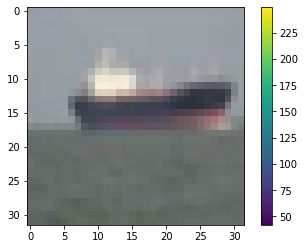

In [5]:
plt.figure()
plt.imshow(X_train[69])
plt.colorbar()

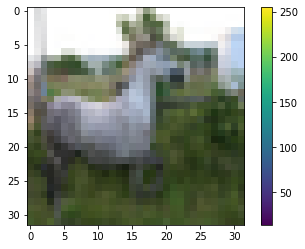

In [6]:
plt.figure()
plt.imshow(X_test[69])
plt.colorbar()

In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

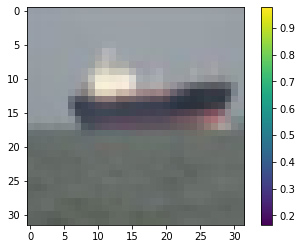

In [8]:
plt.figure()
plt.imshow(X_train[69])
plt.colorbar()
#plt.imshow(X_test[69])
#plt.colorbar()

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Conv2D
from tensorflow.keras.layers import MaxPool2D, Activation, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [10]:
model = Sequential()
model.add(Conv2D(64,activation = 'relu',kernel_size = (3,3 )))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(BatchNormalization())
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(20, activation = 'softmax'))


In [11]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=20, verbose=1, 
                  validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 7s 208us/sample - loss: 1.4459 - accuracy: 0.5170 - val_loss: 1.3076 - val_accuracy: 0.5443
Epoch 2/20
35000/35000 [==============================] - 4s 114us/sample - loss: 0.9475 - accuracy: 0.6660 - val_loss: 1.3662 - val_accuracy: 0.5579
Epoch 3/20
35000/35000 [==============================] - 4s 117us/sample - loss: 0.7365 - accuracy: 0.7386 - val_loss: 1.1422 - val_accuracy: 0.6134
Epoch 4/20
35000/35000 [==============================] - 4s 117us/sample - loss: 0.5652 - accuracy: 0.7998 - val_loss: 1.3195 - val_accuracy: 0.6161
Epoch 5/20
35000/35000 [==============================] - 4s 116us/sample - loss: 0.4173 - accuracy: 0.8559 - val_loss: 1.5859 - val_accuracy: 0.5951
Epoch 6/20
35000/35000 [==============================] - 4s 115us/sample - loss: 0.3002 - accuracy: 0.8939 - val_loss: 1.3835 - val_accuracy: 0.6443
Epoch 7/20
35000/35000 [==========================

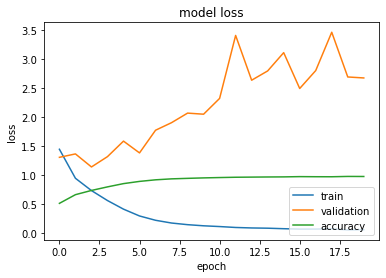

In [13]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation', 'accuracy'], loc = 'lower right')
    plt.show()
    
plotloss(history)

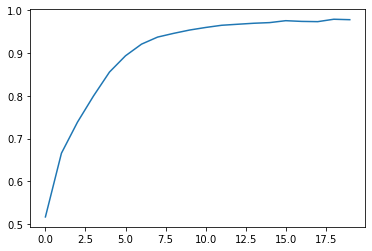

In [14]:
plt.plot(history.history['accuracy'])


In [19]:
history.history['accuracy'][19]*100

97.83714413642883

In [16]:
_,acc=model.evaluate(X_train,y_train)
print(acc*100)

50000/50000 [==============================] - 3s 57us/sample - loss: 0.8753 - accuracy: 0.8626
86.2559974193573
